<a href="https://colab.research.google.com/github/suafle/Clase2/blob/master/checking_cotten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#--quiet is to show less information (Warinings, errors, and so on) when installing
#--pre is to install the pre-releases
!pip install --pre  --quiet astroquery
!pip install --pre  --quiet uncertainties

     |████████████████████████████████| 4.5MB 2.7MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 2.3MB 36.3MB/s 
     |████████████████████████████████| 235kB 2.7MB/s 


In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uncertainties as un
from uncertainties import unumpy
from scipy.interpolate import interp1d
from astropy.coordinates import SkyCoord
from astropy.table import Table
from matplotlib.colors import ListedColormap, BoundaryNorm
from astroquery.vizier import Vizier
from astropy import units as u

In [43]:
#TYC6213-1122-1
data = Vizier.query_region(SkyCoord(ra=242.5526666666667,dec=-21.079083333333333,unit=(u.deg, u.deg),frame='icrs'),width="2s",catalog=["I/345/gaia2","II/328/allwise"])
#print(data[0].to_pandas())
#data0 = data[0].to_pandas()
#data1 = data[1].to_pandas()
print(data[0].columns)
g1 = data[0]['Gmag'][0]
e_g1 = data[0]['e_Gmag'][0]
bp1 = data[0]['BPmag'][0]
e_bp1 = data[0]['e_BPmag'][0]
rp1 = data[0]['RPmag'][0]
e_rp1 = data[0]['e_RPmag'][0]
print(data[1].columns)
j1 = data[1]['Jmag'][0]
e_j1 = data[1]['e_Jmag'][0]
h1 = data[1]['Hmag'][0]
e_h1 = data[1]['e_Hmag'][0]
k1 = data[1]['Kmag'][0]
e_k1 = data[1]['e_Kmag'][0]
w1_1 = data[1]['W1mag'][0]
e_w1_1 = data[1]['e_W1mag'][0]
w2_1 = data[1]['W2mag'][0]
e_w2_1 = data[1]['e_W2mag'][0]
w3_1 = data[1]['W3mag'][0]
e_w3_1 = data[1]['e_W3mag'][0]
w4_1 = data[1]['W4mag'][0]
e_w4_1 = data[1]['e_W4mag'][0]

u_j1 = unumpy.uarray(j1,e_j1)
u_h1 = unumpy.uarray(h1,e_h1)
u_k1 = unumpy.uarray(k1,e_k1)
u_w1_1 = unumpy.uarray(w1_1,e_w1_1)
u_w2_1 = unumpy.uarray(w2_1,e_w2_1)
u_w3_1 = unumpy.uarray(w3_1,e_w3_1)
u_w4_1 = unumpy.uarray(w4_1,e_w4_1)

u_Jf1 = 1594*10**(-1.*u_j1/2.5)
u_Hf1 = 1024*10**(-1.*u_h1/2.5)
u_Kf1 = 666.7*10**(-1.*u_k1/2.5)
u_W1f1 = 309.540*10**(-1.*u_w1_1/2.5)
u_W2f1 = 171.787*10**(-1.*u_w2_1/2.5)
u_W3f1 = 31.674*10**(-1.*u_w3_1/2.5)
u_W4f1 = 8.636*10**(-1.*u_w4_1/2.5)

mags = [j1,h1,k1,w1_1,w2_1,w3_1,w4_1]
e_ma = [e_j1,e_h1,e_k1,e_w1_1,e_w2_1,e_w3_1,e_w4_1]

u_flux = np.array([u_Jf1,u_Hf1,u_Kf1,u_W1f1,u_W2f1,u_W3f1,u_W4f1])

waves = [12355,16458,21603,3.4e4,4.6e4,12e4,22e4]

<TableColumns names=('RA_ICRS','e_RA_ICRS','DE_ICRS','e_DE_ICRS','Source','Plx','e_Plx','pmRA','e_pmRA','pmDE','e_pmDE','Dup','FG','e_FG','Gmag','e_Gmag','FBP','e_FBP','BPmag','e_BPmag','FRP','e_FRP','RPmag','e_RPmag','BP-RP','RV','e_RV','Teff','AG','E_BP-RP_','Rad','Lum')>
<TableColumns names=('AllWISE','RAJ2000','DEJ2000','Im','W1mag','e_W1mag','W2mag','e_W2mag','W3mag','e_W3mag','W4mag','e_W4mag','Jmag','e_Jmag','Hmag','e_Hmag','Kmag','e_Kmag','ccf','ex','var','pmRA','e_pmRA','pmDE','e_pmDE','qph','d2M','_2M')>


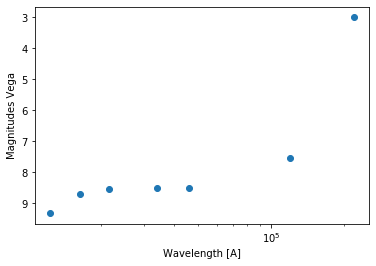

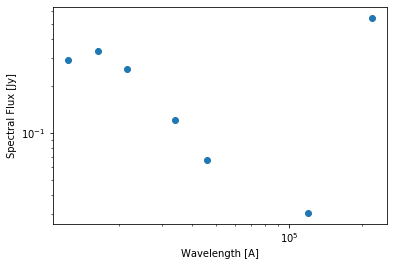

In [46]:
plt.errorbar(waves,mags,yerr=e_ma,fmt='o')
plt.xscale('log')
plt.xlabel('Wavelength [A]')
plt.ylabel('Magnitudes Vega')
plt.gca().invert_yaxis()
plt.show()
plt.close()

plt.errorbar(waves,unumpy.nominal_values(u_flux),yerr=unumpy.std_devs(u_flux),fmt='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength [A]')
plt.ylabel('Spectral Flux [Jy]')
plt.show()
plt.close()
